<a target="_blank" href="https://colab.research.google.com/github/trainocate-japan/Machine-Learning-and-Deep-Learning-Hands-on/blob/main/exercise/2_線形回帰/2-1-2_線形回帰による中古マンションの価格予測②.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 2-1-2_線形回帰による中古マンションの価格予測（続き）

## ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
# matplotlibで日本語表示するための設定
!pip install japanize_matplotlib | tail -n 1
import japanize_matplotlib

'tail' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


そのほかGoogle Colaboratory上での出力のデフォルト設定をしておくと、結果を確認しやすくなるので、ここで設定しておきます。

In [4]:
# pandasのDataframeの出力
pd.set_option('display.max_columns', 500) # 表示列の最大
pd.set_option('display.max_rows', 500) # 表示行の最大
pd.set_option('display.unicode.east_asian_width', True) # 日本語出力時にヘッダのずれを解消
pd.options.display.float_format = '{:,.5f}'.format # 表示桁数の設定

# ノートブックの表示桁数設定。この設定はprint文には作用せず、セルの最後に書いたものを出力する際に適用される
%precision 3
# numpy配列の指数表示禁止設定
np.set_printoptions(suppress=True)
# numpy配列の表示桁数設定
np.set_printoptions(precision=3)

## データの準備

#### データを取り込む

In [5]:
# csvファイルを読み込みます
totsuka_used = pd.read_csv(r"C:\Users\fujitama\OneDrive - トレノケート株式会社\ドキュメント\JTIS様テキスト_to平林さん\Pythonで学ぶ機械学習＆ディープラーニング ハンズオン - scikit-learn、LightGBM、Keras  TensorFlow -\演習資料\mlho\data\totsuka_used.csv")

## 予測精度の改善① 説明変数を増やしてみる

#### 変数の相関（関係性）を確認する
説明変数を増やす前に特に有用性が高そうだと考えられる変数の関係性を確認します。
seabornライブラリには、変数の相関関係を簡単にプロットすることのできるペアプロットのメソッドが用意されています。

pairplotメソッドの使い方は引数に関係性を見たい変数を指定するだけです。

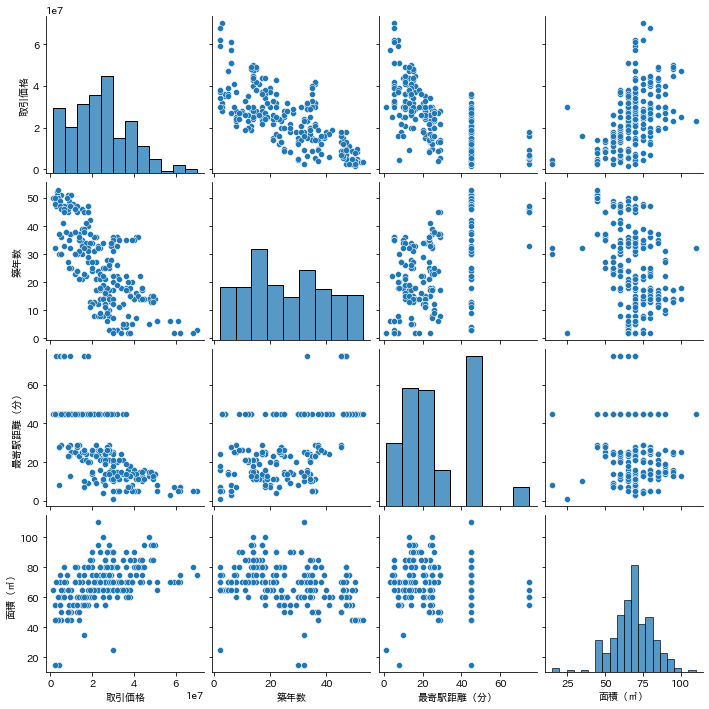

In [6]:
sns.pairplot( totsuka_used[['取引価格','築年数','最寄駅距離（分）','面積（㎡）']])

特に着目すべきは一番上段の取引価格と他の変数の関係性です。<br>
築年数や最寄駅からの距離には何となく値が増えるほど価格が下がる右肩下がりな傾向があります。<br>
対して、面積は値が増えるほど価格が上がる傾向があるように見えます。

#### 説明変数を増やす
説明変数に築年数、最寄駅距離（分）、面積（㎡）を設定します。

In [7]:
train_x = totsuka_used[['築年数','最寄駅距離（分）','面積（㎡）']]

In [8]:
train_y = totsuka_used['取引価格']

新たな説明変数で、モデルを学習させ、評価します。

In [9]:
# モデルを定義する
model = LinearRegression()

In [10]:
# 学習
model.fit(train_x, train_y)

LinearRegression()

In [11]:
# 傾きを求める
# 順番に築年数、最寄り駅距離（分）、面積（㎡）
model.coef_

array([-420413.216, -345247.858,  261623.914])

In [12]:
# 切片を求めるにはintercept_プロパティを使う
model.intercept_

26832489.118

In [13]:
# 精度を確認してみる
model.score(train_x, train_y)

0.744

## 予測精度の改善② カテゴリ変数を説明変数として使う
追加した説明変数は予測に有用だったようで、予測精度を向上させることができました。<br>
さらに、物件のある地区や間取りの情報を説明変数として用いれば精度が向上するかもしれませんが、この二つの列は連続値ではなく、離散値のためそのままでは計算に用いることができません。

そこで、この変数を説明変数として用いることができるようにダミー変数化します。

*   まずは二つの変数についてどのような種類の値が入っているか確認してみます。<br>
DataFrameのvalue_counts()メソッドで値を種類ごとにカウントすることができます。
*   サンプルの少ないカテゴリもあるので、ノイズになる可能性もありそうですが、今回はそのまま使用してみます。（あまり関係性のないデータが入ることで誤った傾向が学習されてしまうようなものをノイズといいます）

In [14]:
# value_countsで値の種類ごとに数を数える
totsuka_used['地区名'].value_counts()

戸塚町      47
上倉田町    29
上矢部町    29
原宿        20
吉田町      18
矢部町      16
下倉田町    14
深谷町      12
秋葉町      10
柏尾町       9
汲沢町       9
名瀬町       9
舞岡町       9
俣野町       7
Name: 地区名, dtype: int64

In [15]:
totsuka_used['間取り'].value_counts()

３ＬＤＫ        149
２ＬＤＫ         43
４ＬＤＫ         20
３ＤＫ           10
１ＬＤＫ          6
２ＬＤＫ＋Ｓ      3
１Ｋ              2
２ＤＫ            2
３ＬＤＫ＋Ｓ      1
４ＤＫ            1
１ＤＫ            1
Name: 間取り, dtype: int64

#### ダミー変数化の実行
- pd.get_dummiesメソッドを使います
- 引数にダミー変数化したい変数を書きます

In [16]:
# 試しに地区名のみダミー変数化してみる
pd.get_dummies(totsuka_used['地区名']).head(3)

,上倉田町,上矢部町,下倉田町,俣野町,原宿,吉田町,名瀬町,戸塚町,柏尾町,汲沢町,深谷町,矢部町,秋葉町,舞岡町
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0


必要な説明変数をすべてダミー変数化する<br>
もとから連続値になっているものはそのまま選択されるので、必要な列をすべて指定する

In [17]:
train_x = pd.get_dummies( totsuka_used[['築年数','最寄駅距離（分）','面積（㎡）','地区名', '間取り']])

train_xの中身を確認してみます

In [18]:
train_x.head()

,築年数,最寄駅距離（分）,面積（㎡）,地区名_上倉田町,地区名_上矢部町,地区名_下倉田町,地区名_俣野町,地区名_原宿,地区名_吉田町,地区名_名瀬町,地区名_戸塚町,地区名_柏尾町,地区名_汲沢町,地区名_深谷町,地区名_矢部町,地区名_秋葉町,地区名_舞岡町,間取り_１ＤＫ,間取り_１Ｋ,間取り_１ＬＤＫ,間取り_２ＤＫ,間取り_２ＬＤＫ,間取り_２ＬＤＫ＋Ｓ,間取り_３ＤＫ,間取り_３ＬＤＫ,間取り_３ＬＤＫ＋Ｓ,間取り_４ＤＫ,間取り_４ＬＤＫ
0,4,45,65,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,42,45,60,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,4,45,65,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,41,45,60,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,3,45,65,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


モデルを再度学習させて、評価します

In [19]:
model.fit(train_x, train_y)

LinearRegression()

In [20]:
# 精度を確認してみる
model.score(train_x, train_y)

0.842

## 訓練データと検証データに分割して評価する

In [21]:
# scikit-learnで提供される、訓練データと検証データを分けるライブラリをインポートする。
from sklearn.model_selection import train_test_split

In [22]:
# 訓練データと検証データに分割(70%を訓練用に使用)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, train_size=0.7, test_size=0.3, random_state=0)

In [23]:
# データ分割後の訓練データの件数を確認する
train_x.shape

(166, 28)

In [24]:
# データ分割後の検証データの件数を確認する
val_x.shape

(72, 28)

分割したデータで訓練データ、検証データそれぞれに対して精度を求めてみます。

In [25]:
# 訓練データを使用して学習
model.fit(train_x, train_y)

LinearRegression()

In [26]:
# 訓練データに対しての精度を確認してみる
model.score(train_x, train_y)

0.858

In [27]:
# 検証データに対しての精度を確認してみる
model.score(val_x, val_y)

0.763

訓練データと検証データに分けそれぞれ精度を確認すると、検証データのほうが低く精度が出ています。<br>
これは自然なことで、未知のデータである検証データのほうが予測は難しくなります。

## （参考）モデルの保存とロード
機械学習モデルで実際に予測をする際は毎回プログラムを動かして学習をさせるわけにはいかないので、通常は学習済みモデルを保存します。<br>
保存方法はいくつかありますが、scikit-learnのモデルを保存する場合はpickleというライブラリを使用して以下のように保存とロードを行うことができます。

In [28]:
# pickleのインポート
import pickle

# モデルの保存
with open('model.pickle', mode='wb') as f:
  pickle.dump(model, f)

In [32]:
# 保存されたファイルを確認
!dir

 ドライブ C のボリューム ラベルがありません。
 ボリューム シリアル番号は DA04-E42E です

 C:\Users\fujitama\OneDrive - トレノケート株式会社\デスクトップ\doc_MAC0025G\mlho\exercise のディレクトリ

2023/03/30  18:09    <DIR>          .
2023/03/30  18:09    <DIR>          ..
2023/03/30  18:09    <DIR>          .ipynb_checkpoints
2023/03/30  18:01             5,928 1-1_Google Colaboratoryを使ってみよう.ipynb
2023/03/30  18:02            18,308 1-2_Python基本文法の復習.ipynb
2023/03/30  18:05            24,842 1-3_機械学習の基本ライブラリ.ipynb
2023/03/30  18:07            26,786 2-1-1_線形回帰による中古マンションの価格予測①.ipynb
2023/03/30  18:09            16,798 2-1-2_線形回帰による中古マンションの価格予測②.ipynb
2022/12/06  01:21            13,481 2-2_（演習）線形回帰による戸建ての価格予測.ipynb
2022/05/11  05:44            11,401 3-1_ロジスティック回帰によるガンの悪性腫瘍の分類.ipynb
2022/05/11  06:05            10,226 3-2_(演習)ロジスティック回帰によるアヤメの分類.ipynb
2022/05/11  17:38            15,073 4-1_決定木による戸建ての価格予測.ipynb
2022/05/11  17:29            10,793 4-2_（演習）決定木によるガンの悪性腫瘍の分類.ipynb
2022/05/11  17:42            10,270 4-3_ランダムフォレストによる戸建ての価格予測.ipynb


In [30]:
# モデルのロード
with open('model.pickle', mode='rb') as f:
  load_model = pickle.load(f)

In [31]:
# ロードされたモデルで訓練データを予測して、最初の5件を確認してみる。
# ※訓練データがシャッフルされているので、抽出されるサンプルは変わっています。
load_model.predict(train_x)[:5]

array([17691987.386, 31327385.889, 23587592.521, 36470432.613,
       43534803.141])

このノートブックは以上です。